In [2]:
from statsmodels.iolib.smpickle import load_pickle
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## Prueba con un valor

In [28]:
modelo_lana = load_pickle('modelo_prediccion_lana_3')

In [29]:
resultado_prediccion = modelo_lana.predict([[140.2,5368,250]])
resultado_prediccion

array([[4877.85177857]])

4877 Kg es muy poco teniendo en cuenta la cantidad de animales (5368)

## Prueba con dataset Mirabueno

In [30]:
data = pd.read_csv("datos/datos_completo_mirabueno_ha.csv")
data

,fecha,hectareas,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
0,1985-12-31,250,MIRABUENO,50,1419,563,690,912,3634,15600,19.26,60.46,57.6,208.6,20.9,14.3,6.4
1,1986-12-31,250,MIRABUENO,53,1520,605,1045,680,3903,18167,19.86,61.52,58.1,130.3,20.5,12.9,5.8
2,1987-12-31,250,MIRABUENO,67,1928,637,964,512,4108,11200,19.41,55.77,60.3,199.5,20.7,13.8,6.8
3,1988-12-31,250,MIRABUENO,55,1560,575,1210,310,3710,13197,18.65,61.69,54.9,85.5,20.4,12.9,5.5
4,1989-12-31,250,MIRABUENO,42,1210,457,1091,150,2950,12300,19.82,57.13,56.5,92.5,21.9,14.5,7.1
5,1990-12-31,250,MIRABUENO,35,998,390,969,124,2516,13900,20.23,59.84,56.2,96.0,21.7,14.2,6.8
6,1991-12-31,250,MIRABUENO,39,1122,407,995,60,2623,15800,20.47,60.56,60.3,240.0,20.6,13.2,5.8
7,1992-12-31,250,MIRABUENO,39,1125,451,1225,70,2910,11600,19.80,54.04,62.2,335.2,19.9,14.4,4.7
8,1993-12-31,250,MIRABUENO,43,1240,447,1090,65,2885,10306,19.30,58.81,58.1,155.7,21.0,14.8,5.5
9,1994-12-31,250,MIRABUENO,32,925,428,1342,34,2761,9000,18.87,61.83,53.7,82.5,24.3,13.5,4.6


<AxesSubplot:>

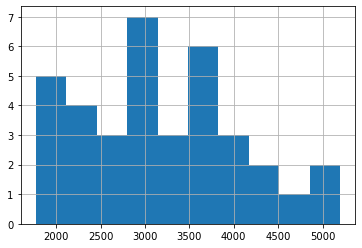

In [6]:
data['total_ovinos'].hist()

<AxesSubplot:>

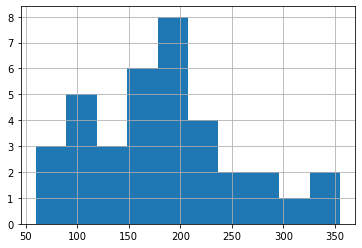

In [7]:
data['cant_lluvia'].hist()

<AxesSubplot:>

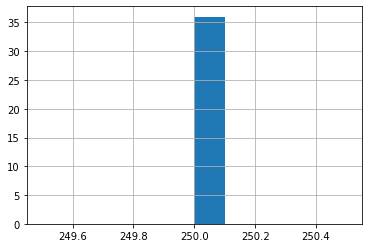

In [8]:
data['hectareas'].hist()

<AxesSubplot:xlabel='cant_lluvia'>

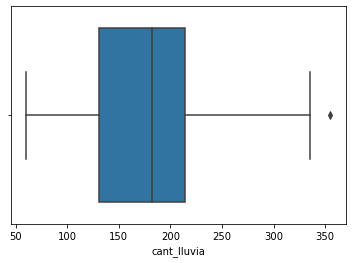

In [9]:
sns.boxplot(x=data['cant_lluvia'])

In [31]:
X_prediccion = data[['cant_lluvia','total_ovinos','hectareas']]
y_prediccion = data[['kilos_lana']]

In [32]:
X_prediccion

,cant_lluvia,total_ovinos,hectareas
0,208.6,3634,250
1,130.3,3903,250
2,199.5,4108,250
3,85.5,3710,250
4,92.5,2950,250
5,96.0,2516,250
6,240.0,2623,250
7,335.2,2910,250
8,155.7,2885,250
9,82.5,2761,250


In [33]:
y_prediccion

,kilos_lana
0,15600
1,18167
2,11200
3,13197
4,12300
5,13900
6,15800
7,11600
8,10306
9,9000


In [34]:
resultado_prediccion_mirabueno = modelo_lana.predict(X_prediccion)
resultado_prediccion_mirabueno

/home/lucila/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[3302.98890053],
       [3549.12854461],
       [3733.22869929],
       [3375.25573295],
       [2685.62465134],
       [2291.82243195],
       [2385.00189399],
       [2642.78745578],
       [2624.95336034],
       [2514.44118839],
       [2115.73196678],
       [2084.15254943],
       [1873.22855089],
       [2655.86044052],
       [2834.17651758],
       [3018.03517041],
       [3190.14713103],
       [3290.03493314],
       [3609.07968231],
       [3404.52291051],
       [4471.28208716],
       [3412.0668151 ],
       [2969.53703274],
       [2059.58710191],
       [1868.03583682],
       [2130.69408029],
       [1615.05110451],
       [1665.64992646],
       [1908.07262473],
       [2644.96783362],
       [3835.3538168 ],
       [4005.78473699],
       [4107.92707329],
       [2806.25813254],
       [4722.81122514],
       [3130.14689712]])

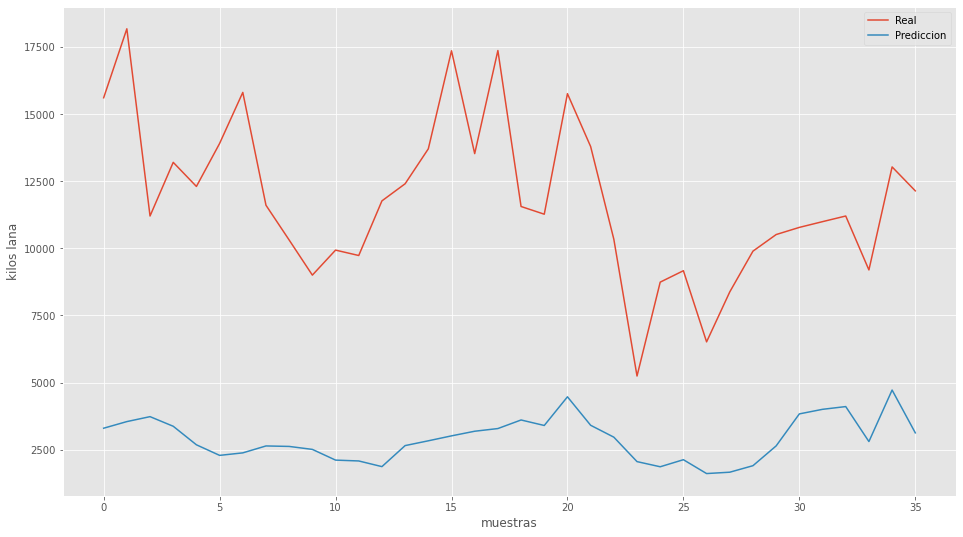

In [35]:
plt.plot(range(len(y_prediccion)),y_prediccion,label="Real")
plt.plot(range(len(resultado_prediccion_mirabueno)),resultado_prediccion_mirabueno,label="Prediccion")
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

## Prueba con dataset Mirabueno escalados

In [39]:
num_attrs = ["cant_lluvia", "total_ovinos","hectareas"]
pipeline = ColumnTransformer([("numeric", StandardScaler(), num_attrs)])
X_prediccion = pipeline.fit_transform(data)
X_prediccion

array([[ 0.38069666,  0.51000798,  0.        ],
       [-0.7291469 ,  0.82114048,  0.        ],
       [ 0.25171101,  1.05824889,  0.        ],
       [-1.36415318,  0.59791158,  0.        ],
       [-1.26493345, -0.28112447,  0.        ],
       [-1.21532358, -0.78310032,  0.        ],
       [ 0.82576802, -0.6593413 ,  0.        ],
       [ 2.17515636, -0.32738952,  0.        ],
       [-0.36912102, -0.35630518,  0.        ],
       [-1.40667592, -0.49972686,  0.        ],
       [ 1.21981209, -1.00170271,  0.        ],
       [-1.72843133, -1.04912439,  0.        ],
       [ 1.37289396, -1.31052195,  0.        ],
       [ 2.45580645, -0.31004013,  0.        ],
       [ 1.71024105, -0.08449798,  0.        ],
       [ 0.43597622,  0.14682729,  0.        ],
       [ 0.09012459,  0.36542968,  0.        ],
       [ 0.51393458,  0.49381521,  0.        ],
       [-0.29399751,  0.89863444,  0.        ],
       [-0.53637714,  0.63723688,  0.        ],
       [-0.02752166,  1.99858614,  0.   

In [40]:
standard_scaler = StandardScaler()
l_values = data[['kilos_lana']]
scaled_values = standard_scaler.fit(l_values)
y_prediccion = standard_scaler.transform(l_values)
y_prediccion

array([[ 1.30905611],
       [ 2.19648473],
       [-0.21205253],
       [ 0.47832337],
       [ 0.16822463],
       [ 0.72135505],
       [ 1.37819742],
       [-0.07376993],
       [-0.52111415],
       [-0.97260686],
       [-0.65075409],
       [-0.7202411 ],
       [-0.01741977],
       [ 0.20279528],
       [ 0.65221374],
       [ 1.9136968 ],
       [ 0.59067799],
       [ 1.91680816],
       [-0.08967243],
       [-0.1888902 ],
       [ 1.36194921],
       [ 0.6815988 ],
       [-0.51074296],
       [-2.2707348 ],
       [-1.06283626],
       [-0.91591099],
       [-1.83134183],
       [-1.18832772],
       [-0.66423665],
       [-0.45059002],
       [-0.35863209],
       [-0.2846509 ],
       [-0.21205253],
       [-0.9058855 ],
       [ 0.41955326],
       [ 0.11152876]])

In [41]:
resultado_prediccion_mirabueno_scaler = modelo_lana.predict(X_prediccion)
resultado_prediccion_mirabueno_scaler

array([[ 0.45379084],
       [ 0.76599404],
       [ 0.95461493],
       [ 0.58062915],
       [-0.21947589],
       [-0.67618769],
       [-0.6190099 ],
       [-0.35429792],
       [-0.31185594],
       [-0.41395759],
       [-0.94022245],
       [-0.90366488],
       [-1.224503  ],
       [-0.34613432],
       [-0.12140763],
       [ 0.12283553],
       [ 0.33047798],
       [ 0.43550514],
       [ 0.82454831],
       [ 0.59396083],
       [ 1.81518877],
       [ 0.58279926],
       [ 0.07310094],
       [-0.96844382],
       [-1.19182415],
       [-0.89347279],
       [-1.4711515 ],
       [-1.42706852],
       [-1.15574116],
       [-0.29977456],
       [ 1.10316343],
       [ 1.26336025],
       [ 1.36491651],
       [-0.08019397],
       [ 2.1093114 ],
       [ 0.29484595]])

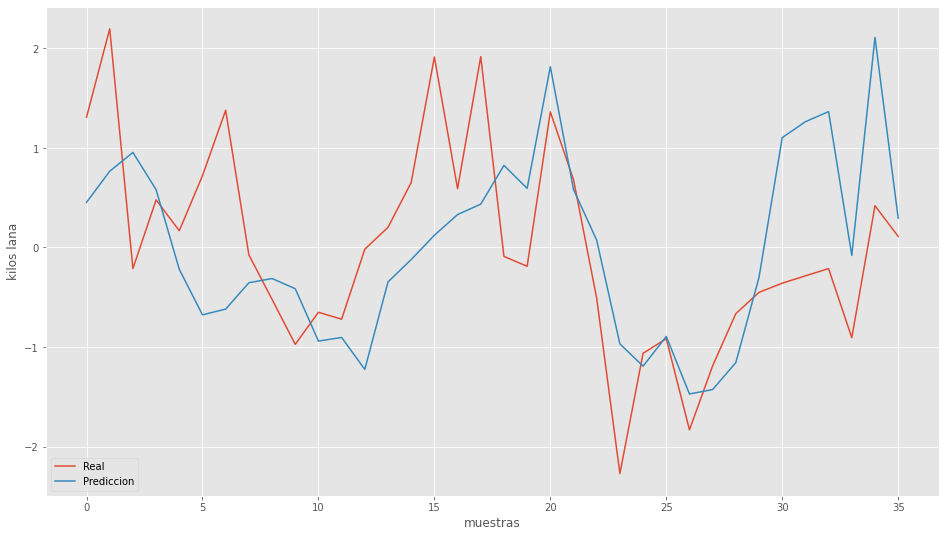

In [42]:
plt.plot(range(len(y_prediccion)),y_prediccion,label="Real")
plt.plot(range(len(resultado_prediccion_mirabueno_scaler)),resultado_prediccion_mirabueno_scaler,label="Prediccion")
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

In [43]:
print('Exactitud de la predicción:')
print(str(round(r2_score(y_prediccion, resultado_prediccion_mirabueno_scaler),4)))

Exactitud de la predicción:
0.0728


In [44]:
print('MSE:')
print(str(round(mean_squared_error(y_prediccion, resultado_prediccion_mirabueno_scaler),4)))

MSE:
0.9272


## Prueba de gráfico para el usuario

In [45]:
y_predición_kg=standard_scaler.inverse_transform(resultado_prediccion_mirabueno_scaler)
y_predición_kg

array([[13126.03653478],
       [14029.12395476],
       [14574.73384291],
       [13492.93245367],
       [11178.52699812],
       [ 9857.4300907 ],
       [10022.82410986],
       [10788.53714467],
       [10911.3059573 ],
       [10615.96398481],
       [ 9093.67600817],
       [ 9199.42343648],
       [ 8271.35839741],
       [10812.15140705],
       [11462.2018976 ],
       [12168.70625085],
       [12769.33842138],
       [13073.14283263],
       [14198.49963113],
       [13531.49605097],
       [17064.05300235],
       [13499.20978143],
       [12024.8426452 ],
       [ 9012.04210876],
       [ 8365.88613711],
       [ 9228.90532941],
       [ 7557.89627132],
       [ 7685.4118936 ],
       [ 8470.26076914],
       [10946.2528988 ],
       [15004.42924697],
       [15467.81890198],
       [15761.58330068],
       [11581.41762937],
       [17914.84006249],
       [12666.26825536]])

In [46]:
y_real_kg=standard_scaler.inverse_transform(y_prediccion)
y_real_kg

array([[15600.],
       [18167.],
       [11200.],
       [13197.],
       [12300.],
       [13900.],
       [15800.],
       [11600.],
       [10306.],
       [ 9000.],
       [ 9931.],
       [ 9730.],
       [11763.],
       [12400.],
       [13700.],
       [17349.],
       [13522.],
       [17358.],
       [11554.],
       [11267.],
       [15753.],
       [13785.],
       [10336.],
       [ 5245.],
       [ 8739.],
       [ 9164.],
       [ 6516.],
       [ 8376.],
       [ 9892.],
       [10510.],
       [10776.],
       [10990.],
       [11200.],
       [ 9193.],
       [13027.],
       [12136.]])

In [47]:
anios = []
for fecha in data['fecha']:
    fecha_partes = fecha.split('-')
    anios.append(fecha_partes[0])

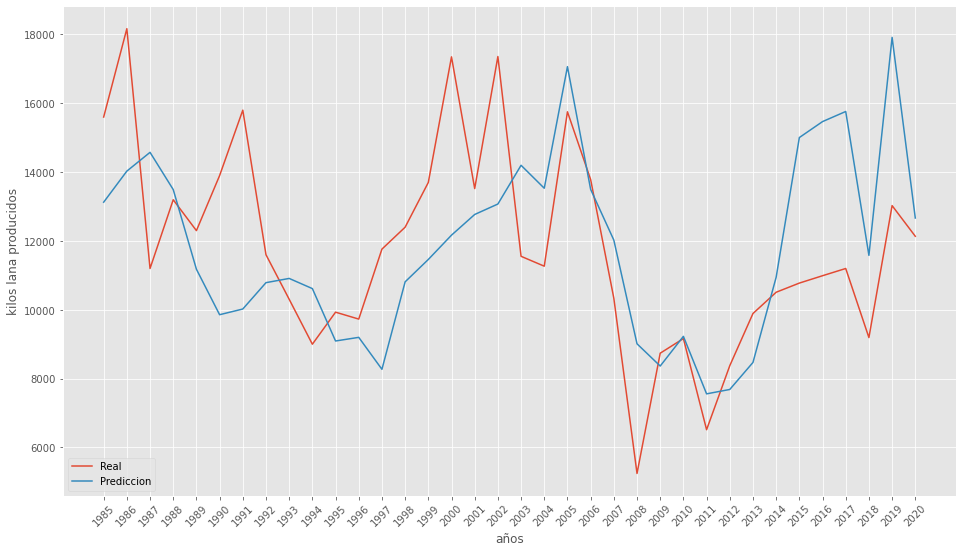

In [48]:
plt.plot(anios,y_real_kg,label="Real")
plt.plot(anios,y_predición_kg,label="Prediccion")
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.xticks(rotation = 45)
plt.xlabel('años')
plt.ylabel('kilos lana producidos')
plt.legend()
plt.show()

In [49]:
print('Exactitud de la predicción:')
value = round(r2_score(y_real_kg, y_predición_kg),4) * 100
print(str(value)+'%')

Exactitud de la predicción:
7.28%


En la aplicación:
- Obtener el acumulado de lluvia hasta la fecha
- Obtener la cantidad de animales actual
- Usar ambos datos y el modelo de lana para predecir la lana del año actual
- Agregar un registro al dataset de prediccion con los kg predichos para que aparezca en el grafico
- Hacer mas evidente la predicción con un cartelito al costado donde le vamos a decir al usuario: "El modelo predice que la cantidad de kg de lana que va a producir este año es de 12365 con un 68% de exactitud"